<a href="https://colab.research.google.com/github/sndavidson/savdav/blob/master/IE200_Final_Exam_2019_Savannah_Davidson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Compare groups


The dataset "stereo-fusion.csv" contains results from an experiment in visual perception using random dot sterograms, such as that shown below. Both images appear to be composed entirely of random dots. However, they are constructed so that a 3D image (of a diamond) will be seen, if the images are viewed with a stereo viewer, causing the separate images to fuse. Another way to fuse the images is to fixate on a point between them and defocus they eyes, but this technique takes some effort and practice.


An experiment was performed to determine whether knowledge of the form of the embedded image affected the time required for subjects to fuse the images. One group of subjects (group NV) received either no information or just verbal information about the shape of the embedded object. A second group (group VV) received both verbal information and visual information (e.g., a drawing of the object).

<img src="https://github.com/utk-ie200/repo-Davidson-Savannah/blob/master/exam03/files/fusion0.gif?raw=1">

## Objective: 
    1. Explore the normality of the data using Shapiro test and probability plots.
    2. Check the significance of differences between the groups using an appropriate statisitcal test, and report your findings.

In [0]:
import pandas as pd 
df = pd.read_csv("fusion.txt", sep = "\s+")
df.head()

,time,group
0,47.20001,NV
1,21.99998,NV
2,20.39999,NV
3,19.70001,NV
4,17.40000,NV


In [0]:
from scipy.stats import norm
from scipy.stats import probplot
from matplotlib import pyplot as plt
from scipy.stats import shapiro
%matplotlib inline

#Variables
average = df.time.mean()
stan_dev = df.time.std(ddof = 1)
variance = stan_dev*2

#df.shape, don't necessarily need this line

#Normal Distribution
x = norm(loc = average, scale = variance/78)
smpl = x.rvs(20) #creates sample
shapiro(smpl)

(0.9776298403739929, 0.8999636173248291)

P Value Changes each time line is run. P Value consistently stays above .05, meaning the data is normal.

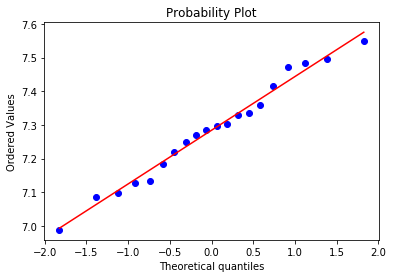

In [0]:
_ = probplot(smpl,plot = plt,dist=norm) #creates probability plot

In [0]:
import numpy as np

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f449a834ba8>>

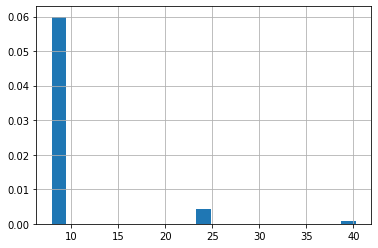

In [0]:
df.time.hist(density=True,bins=3,rwidth=.1)

In [0]:
total = df.groupby( ['group'], as_index = False).time.mean() 
total.head()

,group,time
0,NV,8.560465
1,VV,5.551429


In [0]:
x = total[ total.group=='NV'].time
x= np.array( x )

y = total[ total.group=='VV'].time
y = np.array(y)

observed_difference = np.mean(x)-np.mean(y)
print("Observed Difference = ", observed_difference)

Observed Difference =  3.0090357940199315



> The observed difference is not super significant. Group NV's average time was only 3 seconds slower than group VV's time. All things considered, the lack of information group NV had makes this slight difference valid, because group VV knows what they are supposed to be seeing, while NV has to figure it out. A stereo viewer would display the same image no matter who is viewing it, so the slight difference in time is based upon the users ability to interpret the image quickly. A 3 second difference between the average time for the 2 groups is not a significant enough difference. It makes sense that group VV had faster times because they knew what they were identifying.



# 2. Compare groups


The data contains the outcomes for two items in the Montana Economic Outlook Poll conducted in May 1992, with accompanying demographics for 209 out of 418 poll respondents. The items are whether the respondent feels his/her financial status is worse, the same, or better than a year ago, and whether the respondent views the state economic outlook as better over the next year. Respondents are classified by age, income , political orientation, and area of residence in the state. 

## Objective: 
Formulate a resonable research question and use an appropriate statistical test for the difference between proportions for the two samples.

Variable Names:

- AGE = 1 under 35, 2 35-54, 3 55 and over
- SEX = 0 male, 1 female
- INC = yearly income: 1 under $20K, 2 20-35$K, 3 over $35K
- POL = 1 Democrat, 2 Independent, 3 Republican
- AREA = 1 Western, 2 Northeastern, 3 Southeastern Montana
- FIN = Financial status 1 worse, 2 same, 3 better than a year ago
- STAT = State economic outlook 0 better, 1 not better than a year ago


# **My Research Question:** *Does someone's personal financial status significantly affect the way he/she views the state's future economy?*

In [0]:
total = df.groupby( ['FIN','STAT'], as_index = False)
total.head()

,AGE,SEX,INC,POL,AREA,FIN,STAT
0,3,0,2,2,1,2,1
1,2,0,3,3,1,3,1
2,1,0,2,*,1,2,1
3,3,1,2,1,1,1,0
4,3,1,3,3,3,2,*
5,1,0,2,1,3,3,*
6,3,1,1,3,3,1,1
7,1,0,1,3,2,1,0
8,3,1,*,3,3,2,0
9,1,0,*,1,1,2,1


In [0]:
df = pd.read_csv("montana.txt",sep="\s+")
df.head()
dd=df[ df.FIN!="*"] # exclude missing data
dd.FIN.mean() # average in column FIN
dd.FIN.unique() # unique values in column FIN

array(['2', '3', '1'], dtype=object)

In [0]:
dd.FIN.value_counts() #calculates totals for each financial bracket

2    76
3    71
1    61
Name: FIN, dtype: int64

In [0]:
dd.STAT.value_counts() #calculates totals for state economic outlook

0    118
1     62
*     28
Name: STAT, dtype: int64

In [0]:
chart = pd.crosstab(dd.FIN, dd.STAT)
chart

STAT,*,0,1
FIN,,,
1,1,47,13
2,14,41,21
3,13,30,28


I will only be using the worse (1) and better (3) statistics for FIN.

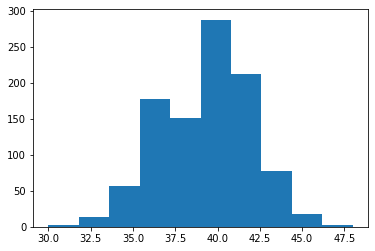

In [0]:
from scipy.stats import hypergeom
S = hypergeom( M = 118, n = 77, N = 60)
_ = plt.hist(S.rvs(1000))

In [0]:
print("Mean: ", S.mean())

Mean:  39.152542372881356


In [0]:
fisher_chart = np.matrix([[47,13],[30,28]])
fisher_chart

matrix([[47, 13],
        [30, 28]])

In [0]:
from scipy.stats import fisher_exact
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(fisher_chart)
print("P value = ", pvalue)

P value =  0.003533589464767294


Conclusion
> The p value that resulted from the fishers test I performed comparing personal financial status and state economic outlook was .0035. This means that it is statistically significant, so someone's personal financial status affects the way they view the states economic outlook.



# 3. Compare Groups

The data files contain play-by-play information about UT games in 2017 and 2018. 
Compare the two years with respect to the average gain on a pass play, and the average gain on a run play. Display the corresponding bar plots, check the data for normality, and run the comparisons using a) t-test and b) permutation test. Report your findings.

In [0]:
data2017 = pd.read_csv("gamedata2017.txt")
data2018 = pd.read_csv("gamedata2018.txt")

### COLUMN NAMES

First, let us check the columns in the dataset.

In [0]:
data2017.columns

Index(['gamedesc', 'teama', 'teamascore', 'teamb', 'teambscore', 'scorediff',
       'down', 'yardstomove', 'fieldside', 'fieldpos', 'distancetogoal',
       'playdesc', 'curteam', 'playtype', 'gain'],
      dtype='object')

In [0]:
for index, row in data2018.iterrows():
    print(row.curteam, " ### ", row.playdesc)

WVU  ###  (15:00 - 1st) Evan Staley kickoff for 65 yds for a touchback
WVU  ###  (15:00 - 1st) Jarrett Guarantano run for a loss of 2 yards to the Tenn 15 Jarrett Guarantano fumbled, forced by Kenny Bigelow Jr., recovered by Tenn Josh Palmer
WVU  ###  (15:00 - 1st) Jarrett Guarantano pass incomplete to Marquez Callaway, broken up by Hakeem Bailey
WVU  ###  (15:00 - 1st) Ty Chandler run for a loss of 5 yards to the Tenn 10
WVU  ###  (15:00 - 1st) Joe Doyle punt for 37 yds , Marcus Simms returns for a loss of 1 yard to the Tenn 48
TENN  ###  (13:25 - 1st) Will Grier pass complete to Gary Jennings Jr. for 10 yds to the Tenn 38 for a 1ST down
TENN  ###  (13:25 - 1st) Pettaway, M. rush for no gain to the UT38 (Tuttle,S.;Taylor,A.), PENALTY WVU holding 10 yards to the UT48, NO PLAY.
TENN  ###  (13:25 - 1st) Will Grier pass complete to David Sills V. for 25 yds to the Tenn 23 for a 1ST down
TENN  ###  (13:25 - 1st) Martell Pettaway run for 12 yds to the Tenn 11 for a 1ST down
TENN  ###  (13:2

In [0]:
import statistics
import matplotlib.pyplot as plt

#2017 Stats
passing_17 = data2017[(data2017.playtype=='pass')&(data2017.curteam=='TENN')]
p_gains17 = passing_17.gain
avg_p_gains17 = statistics.mean(p_gains17)
print("Average Passing Gains 2017: ", avg_p_gains17)
running_17 = data2017[(data2017.playtype=='run')&(data2017.curteam=='TENN')]
r_gains17 = running_17.gain
avg_r_gains17 = statistics.mean(r_gains17)
print("Average Running Gains 2017: ", avg_r_gains17)

#2018 Stats
passing_18 = data2018[(data2018.playtype=='pass')&(data2018.curteam=='TENN')]
p_gains18 = passing_18.gain
avg_p_gains18 = statistics.mean(p_gains18)
print("Average Passing Gains 2018: ", avg_p_gains18)
running_18 = data2018[(data2018.playtype=='run')&(data2018.curteam=='TENN')]
r_gains18 = running_18.gain
avg_r_gains18 = statistics.mean(r_gains18)
print("Average Running Gains 2018: ", avg_r_gains18)

Average Passing Gains 2017:  5.822485207100592
Average Running Gains 2017:  4.690322580645161
Average Passing Gains 2018:  8.547619047619047
Average Running Gains 2018:  4.090909090909091


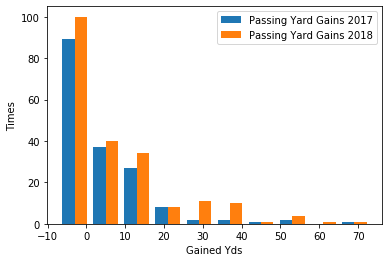

In [0]:
#Passing Yards Bar Plot
plt.hist([p_gains17, p_gains18], label=['Passing Yard Gains 2017', 'Passing Yard Gains 2018'])
plt.xlabel('Gained Yds')
plt.ylabel('Times')
plt.legend()

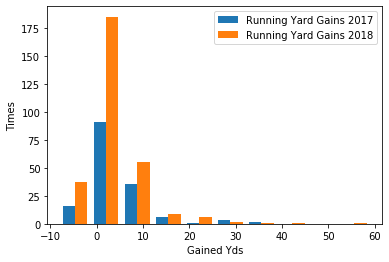

In [0]:
#Running Yards Bar Plot
plt.hist([r_gains17, r_gains18], label=['Running Yard Gains 2017', 'Running Yard Gains 2018'])
plt.xlabel('Gained Yds')
plt.ylabel('Times')
plt.legend()

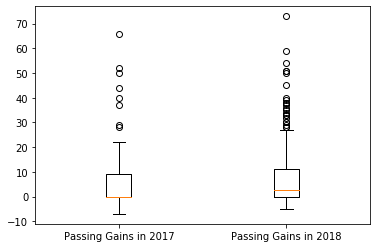

In [0]:
#Box Plot for Passing Yards
_ = plt.boxplot([p_gains17, p_gains18], labels = ["Passing Gains in 2017", "Passing Gains in 2018"])

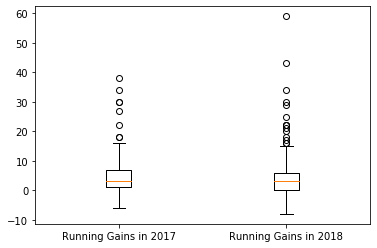

In [0]:
#Box Plot for Running Yards
_ = plt.boxplot([r_gains17, r_gains18], labels = ["Running Gains in 2017", "Running Gains in 2018"])

In [0]:
#Testing for Normality - Passing Yards in 2017
p17_std_dev = p_gains17.std(ddof=1)
p17_variance = (p17_std_dev)*2
p17_size = 169
p17_scale = (p17_variance)/(p17_size)
p17_normal = norm(loc = avg_p_gains17, scale = p17_scale)
p17_smpl = p17_normal.rvs(20)
shapiro(p17_smpl)

(0.9825936555862427, 0.9630292057991028)

In [0]:
#Testing for Normality - Passing Yards in 2018
p18_std_dev = p_gains18.std(ddof=1)
p18_variance = (p18_std_dev)*2
p18_size = 210
p18_scale = (p18_variance)/(p18_size)
p18_normal = norm(loc = avg_p_gains18, scale = p18_scale)
p18_smpl = p18_normal.rvs(20)
shapiro(p18_smpl)

(0.9710792899131775, 0.7774919271469116)

In [0]:
#Testing for Normality - Running Yards in 2017
r17_std_dev = r_gains17.std(ddof=1)
r17_variance = (r17_std_dev)*2
r17_size = 155
r17_scale = (r17_variance)/(r17_size)
r17_normal = norm(loc = avg_r_gains17, scale = r17_scale)
r17_smpl = r17_normal.rvs(20)
shapiro(r17_smpl)

(0.9750983715057373, 0.8566283583641052)

In [0]:
#Testing for Normality - Running Yards in 2018
r18_std_dev = r_gains18.std(ddof=1)
r18_variance = (r18_std_dev)*2
r18_size = 297
r18_scale = (r18_variance)/(r18_size)
r18_normal = norm(loc = avg_r_gains18, scale = r18_scale)
r18_smpl = r18_normal.rvs(20)
shapiro(r18_smpl)

(0.9738922715187073, 0.8339697122573853)

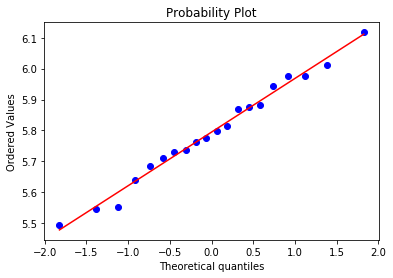

In [0]:
#Passing Yards 2017 Probability Plot
_ = probplot(p17_smpl, plot=plt, dist=norm)

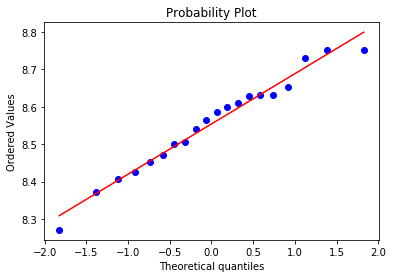

In [0]:
#Passing Yards 2018 Prob Plot
_ = probplot(p18_smpl, plot=plt, dist=norm)

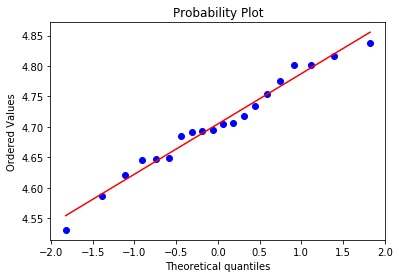

In [0]:
#Running Yards 2017 Prob Plot
_ = probplot(r17_smpl, plot=plt, dist=norm)

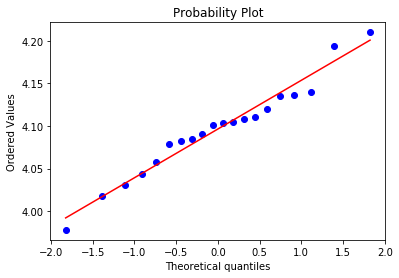

In [0]:
#Running Yards 2018 Prob Plot
_ = probplot(r18_smpl, plot=plt, dist=norm)

T-Test

In [0]:
from scipy.stats import ttest_ind
passing_ttest = ttest_ind(p_gains17, p_gains18, equal_var=False).pvalue
running_ttest = ttest_ind(r_gains17, r_gains18, equal_var=False).pvalue
print("Passing t-test pval: ", passing_ttest)
print("Running t-test pval: ", running_ttest)

Passing t-test pval:  0.02541032931235878
Running t-test pval:  0.3811868926612193


Permutation Test

In [0]:
from numpy.random import shuffle
np.mean(p_gains17)
np.mean(p_gains18)
total_passing = np.append(p_gains17, p_gains18)
len(total_passing)

379

In [0]:
diff = np.array([])
ntrials = 1000

for n in range(ntrials):
    shuffle(total_passing)    
    A = total_passing[:len(p_gains17)] 
    B = total_passing[len(p_gains17):] 
    mean1 = np.mean(A)
    mean2 = np.mean(B)    
    diff=np.append(diff,mean1-mean2)

diff[:15]

array([ 0.19025077, -2.59698507, -3.59013807, -2.08438997,  2.88137504,
        0.78827839, -0.49320935,  1.92025923,  0.17957171, -0.27962806,
       -1.34753452, -0.65339532, -0.76018597,  0.91642716,  2.59304029])

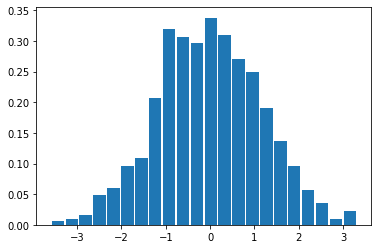

In [0]:
_=plt.hist(diff,rwidth=0.9,bins='auto',density=True)

In [0]:
np.mean(p_gains17) - np.mean(p_gains18)

-2.7251338405184553

Conclusion:

> In 2018, UT improved in passing gains and increased it's average running gains. 2018 brought high outliers in passing gains, therefore increasing the passing average. Although there were many high outliers for our running plays, unfortunately the average remained the same. The passing gains improved the most compared to the running gains between 2017 and 2018. Let's hope we make big improvements in Fall 2020! Go Vols!

# 4. Counting

Antonin Dvorak is a Czech composer of 9 symphonies. Pyotr Tchaikovsky is a Russian composer of 7 symphonies.

- a. If a radio station announcer wants to play all 16 symphonies once, in how many ways can this be done.
- b. If a radio station announcer only wants to play exactly two symphonies – first a Dvorak symphony and then a Tchaikovsky symphony – in how many ways can this be done?
- c. If a radio station announcer randomly selects 3 symphonies out of 16 (equally probably), what is the probability that exactly 2 of the selected symphonies belong to Dvorak?
- d. If a radio station announcer randomly selects 3 symphonies out of 16 (equally probably), what is the probability that all three of the selected symphonies have the same author?

In [0]:
a = 16*15*14*13*12*11*10*9*8*7*6*5*4*3*2
a

20922789888000

In [0]:
b = 9*7
b

63

In [0]:
c = (36*7)/560
c

0.45

In [0]:
d = (84+35)/560
d

0.2125